<a href="https://colab.research.google.com/github/KummariShravya/HTML-Project/blob/main/2021_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import datetime, timedelta

In [ ]:
df=pd.read_csv('2021_IITH_NewFormat.csv')
df

,Timestamp,F..Solar.Radiation.Light,G..Relative.Humidity,H..Temperature,I..Rainfall,J..Wind.Direction,K..Wind.Gust,L..Wind.Speed,Time
0,1/1/2021 0:00,0,87.2,19.7,0.0,131,5,0,1/1/2021 0:00
1,1/1/2021 0:10,0,87.4,19.7,0.0,131,3,0,1/1/2021 0:10
2,1/1/2021 0:20,0,87.7,19.6,0.0,131,3,0,1/1/2021 0:20
3,1/1/2021 0:30,0,88.2,19.5,0.0,131,2,0,1/1/2021 0:30
4,1/1/2021 0:40,0,88.7,19.3,0.0,131,2,0,1/1/2021 0:40
...,...,...,...,...,...,...,...,...,...
18595,13-05-2021 02:30:00,0,71.9,28.1,0.0,146,8,2,5/13/2021 2:30
18596,13-05-2021 02:40:00,0,70.2,27.8,0.0,148,6,2,5/13/2021 2:40
18597,13-05-2021 02:50:00,0,70.8,27.6,0.0,148,8,3,5/13/2021 2:50
18598,13-05-2021 03:00:00,0,70.9,27.3,0.0,153,8,3,5/13/2021 3:00


In [ ]:
type(df['I..Rainfall'][0])

numpy.float64

In [ ]:
df=df.rename({'I..Rainfall':'Rainfall'},axis=1)

In [ ]:
import datetime

def convert_datetime_string(Timestamp):
    # check if the date string is in '%d-%m-%Y' format
    if '/' in Timestamp:
        Timestamp = Timestamp.replace('/', '-')
        parts = Timestamp.split('-')

        #if len(parts[0]) >= 4:
            # swap day and year parts
            #Timestamp = f"{parts[2]}-{parts[1]}-{parts[0]} {parts[3]}"
    else:
        parts = Timestamp.split('-')
        #if len(parts[0]) >= 4:
            # swap day and year parts
            #Timestamp = f"{parts[2]}-{parts[1]}-{parts[0]} {parts[3]}"
    date_part, time_part = Timestamp.split(' ')
    day,month,year = map(str, date_part.split('-'))
    if(len(time_part)>5):
      hours, minutes,seconds = map(str, time_part.split(':'))
    else:
      hours, minutes = map(str, time_part.split(':'))



    dt = datetime.datetime(year=int(year), month=int(month), day=int(day), hour=int(hours), minute=int(minutes), second=0)
    return dt.strftime('%d-%m-%Y %H:%M:%S')

df['date_time'] = df['Timestamp'].apply(convert_datetime_string)


In [ ]:
df

,Timestamp,F..Solar.Radiation.Light,G..Relative.Humidity,H..Temperature,Rainfall,J..Wind.Direction,K..Wind.Gust,L..Wind.Speed,Time,date_time
0,1/1/2021 0:00,0,87.2,19.7,0.0,131,5,0,1/1/2021 0:00,01-01-2021 00:00:00
1,1/1/2021 0:10,0,87.4,19.7,0.0,131,3,0,1/1/2021 0:10,01-01-2021 00:10:00
2,1/1/2021 0:20,0,87.7,19.6,0.0,131,3,0,1/1/2021 0:20,01-01-2021 00:20:00
3,1/1/2021 0:30,0,88.2,19.5,0.0,131,2,0,1/1/2021 0:30,01-01-2021 00:30:00
4,1/1/2021 0:40,0,88.7,19.3,0.0,131,2,0,1/1/2021 0:40,01-01-2021 00:40:00
...,...,...,...,...,...,...,...,...,...,...
18595,13-05-2021 02:30:00,0,71.9,28.1,0.0,146,8,2,5/13/2021 2:30,13-05-2021 02:30:00
18596,13-05-2021 02:40:00,0,70.2,27.8,0.0,148,6,2,5/13/2021 2:40,13-05-2021 02:40:00
18597,13-05-2021 02:50:00,0,70.8,27.6,0.0,148,8,3,5/13/2021 2:50,13-05-2021 02:50:00
18598,13-05-2021 03:00:00,0,70.9,27.3,0.0,153,8,3,5/13/2021 3:00,13-05-2021 03:00:00


In [ ]:
df=df.rename({'date_time':'Timestamp1'},axis=1)
df = df[['Timestamp1','Rainfall']]
df.head()

,Timestamp1,Rainfall
0,01-01-2021 00:00:00,0.0
1,01-01-2021 00:10:00,0.0
2,01-01-2021 00:20:00,0.0
3,01-01-2021 00:30:00,0.0
4,01-01-2021 00:40:00,0.0


In [ ]:
print(df['Timestamp1'][3860])
print(type(df['Timestamp1'][3860]))


28-01-2021 09:50:00
<class 'str'>


In [ ]:
if '/' in df['Timestamp1'][3860]:
  df['Timestamp1'][3860] = df['Timestamp1'][3860].replace('/', '-')
  parts = df['Timestamp1'][3860].split('-')
  print(parts[0])


else:
  parts = df['Timestamp1'][3860].split('-')
  print(parts[0])




28


In [ ]:
date_part, time_part = df['Timestamp1'][3860].split(' ')
print(date_part)
print(time_part)
print(len(date_part))
print(len(time_part))
print(type(date_part))
print(type(time_part))

28-01-2021
09:50:00
10
8
<class 'str'>
<class 'str'>


In [ ]:
day,month,year = map(str, date_part.split('-'))
print(year)
print(month)
print(day)
print(type(year))
print(type(month))
print(type(day))

2021
01
28
<class 'str'>
<class 'str'>
<class 'str'>


In [ ]:
print(df['Timestamp1'][3865])

28-01-2021 10:40:00


In [ ]:
if '/' in df['Timestamp1'][3865]:
  df['Timestamp1'][3865] = df['Timestamp1'][3865].replace('/', '-')
  parts = df['Timestamp1'][3865].split('-')
  print(parts[0])


else:
  parts = df['Timestamp1'][3865].split('-')
  print(parts[0])




28


In [ ]:
date_part, time_part = df['Timestamp1'][3865].split(' ')
print(date_part)
print(time_part)
print(len(date_part))
print(len(time_part))
print(type(date_part))
print(type(time_part))

28-01-2021
10:40:00
10
8
<class 'str'>
<class 'str'>


In [ ]:
day,month,year = map(str, date_part.split('-'))
print(year)
print(month)
print(day)
print(type(year))
print(type(month))
print(type(day))

2021
01
28
<class 'str'>
<class 'str'>
<class 'str'>


In [ ]:
df['Date'] = pd.to_datetime(df['Timestamp1'], format='%d-%m-%Y %H:%M:%S').dt.date
for date in df['Date']:
    print(date.strftime('%m'))

In [ ]:
# create a DatetimeIndex object with the desired frequency (10 minutes)
freq = pd.date_range(start='2021-01-01 00:00', end='2021-12-31 23:50', freq='10T')

df['Timestamp1'] = pd.to_datetime(df['Timestamp1'], format='%d-%m-%Y %H:%M:%S')
# find the missing dates
missing_dates = set(freq) - set(pd.to_datetime(df['Timestamp1']))

print(sorted(missing_dates))
print(len(missing_dates))
# find the missing dates
missing_dates = pd.Series(pd.to_datetime(freq)).isin(pd.to_datetime(df['Timestamp1'])) == False

# create a DataFrame with the missing dates
missing_dates_df = pd.DataFrame({'Timestamp1': pd.to_datetime(freq)[missing_dates]})

# extract the month and day from each missing date
missing_dates_df['Month'] = missing_dates_df['Timestamp1'].dt.month
missing_dates_df['Day'] = missing_dates_df['Timestamp1'].dt.day


# group the missing dates by month and count the number of missing dates in each month
missing_dates_by_month = missing_dates_df.groupby('Month')['Timestamp1'].count()
missing_dates_by_month_and_day = missing_dates_df.groupby(['Month', 'Day'])['Timestamp1'].count()

# print the results
print('Missing dates by month:')
print(missing_dates_by_month)

print('Missing values by month and day:')
print(missing_dates_by_month_and_day)
print(len(missing_dates_by_month_and_day))

[Timestamp('2021-01-01 05:00:00', freq='10T'), Timestamp('2021-01-02 09:00:00', freq='10T'), Timestamp('2021-01-02 09:10:00', freq='10T'), Timestamp('2021-01-02 21:10:00', freq='10T'), Timestamp('2021-01-04 04:40:00', freq='10T'), Timestamp('2021-01-05 08:50:00', freq='10T'), Timestamp('2021-01-05 20:50:00', freq='10T'), Timestamp('2021-01-05 22:20:00', freq='10T'), Timestamp('2021-01-06 14:30:00', freq='10T'), Timestamp('2021-01-06 14:40:00', freq='10T'), Timestamp('2021-01-06 14:50:00', freq='10T'), Timestamp('2021-01-06 15:00:00', freq='10T'), Timestamp('2021-01-06 15:10:00', freq='10T'), Timestamp('2021-01-06 15:20:00', freq='10T'), Timestamp('2021-01-06 15:30:00', freq='10T'), Timestamp('2021-01-06 15:40:00', freq='10T'), Timestamp('2021-01-06 15:50:00', freq='10T'), Timestamp('2021-01-06 16:00:00', freq='10T'), Timestamp('2021-01-06 16:10:00', freq='10T'), Timestamp('2021-01-06 16:20:00', freq='10T'), Timestamp('2021-01-06 16:30:00', freq='10T'), Timestamp('2021-01-06 16:40:00', 

In [ ]:
# calculate the total possible timestamps for each month
import calendar
import pandas as pd

total_possible_timestamps_by_month = [(m, len(pd.date_range(start=f'2021-{m:02d}-01 00:00', end=f'2021-{m:02d}-{calendar.monthrange(2021, m)[1]} 23:50', freq='10T'))) for m in range(1, 13)]

# calculate the proportion of missing dates for each month
proportion_missing_dates_by_month = [(m, missing_dates_by_month[m] / t) for m, t in total_possible_timestamps_by_month]

# print the results
for m, p in proportion_missing_dates_by_month:
    print(f"Proportion of missing dates for month {m}: {p:.2%}")


Proportion of missing dates for month 1: 2.20%
Proportion of missing dates for month 2: 1.61%
Proportion of missing dates for month 3: 3.70%
Proportion of missing dates for month 4: 1.81%
Proportion of missing dates for month 5: 61.34%
Proportion of missing dates for month 6: 100.00%
Proportion of missing dates for month 7: 100.00%
Proportion of missing dates for month 8: 100.00%
Proportion of missing dates for month 9: 100.00%
Proportion of missing dates for month 10: 100.00%
Proportion of missing dates for month 11: 100.00%
Proportion of missing dates for month 12: 100.00%


In [ ]:

def sum_rainfall(df):
    """
    Sums the contiguous non-zero rainfall level and notes the start time and end time of the rainfall period.
    Args:
        df: A pandas DataFrame containing the rainfall data.
    Returns:
        A list of tuples, where each tuple contains the start time, end time, and rainfall level of a rainfall period.
    """
    periods = []
    start_time = None
    end_time = None
    total_rainfall = 0

    for i in range(len(df)):
        if float(df.iloc[i, 1]) > 0:
            if start_time is None:
                start_time = datetime.datetime.strptime(df.iloc[i, 0].strftime('%d/%m/%Y %H:%M:%S'), '%d/%m/%Y %H:%M:%S')
            total_rainfall += df.iloc[i, 1]
            end_time = datetime.datetime.strptime(df.iloc[i, 0].strftime('%d/%m/%Y %H:%M:%S'), '%d/%m/%Y %H:%M:%S')
        elif total_rainfall > 0:
            periods.append((start_time, end_time, total_rainfall))
            start_time = None
            end_time = None
            total_rainfall = 0

    if total_rainfall > 0:
        periods.append((start_time, end_time, total_rainfall))

    return periods


def gap_time(periods, gap):
    """
    Sums the contiguous non-zero rainfall level that are separated by a gap less than or equal to the given gap time.
    If interevent time is less than gap time merge the two events.
    Args:
        periods: A list of tuples, where each tuple contains the start time, end time, and rainfall level of a rainfall period.
        gap: A timedelta representing the maximum gap between two contiguous rainfall periods.
    Returns:
        A list of tuples, where each tuple contains the start time, end time, and rainfall level of a rainfall period
        after summing contiguous periods separated by a gap less than or equal to the given gap time.
    """
    new_periods = []
    start_time = None
    end_time = None
    total_rainfall = 0

    for period in periods:
        if start_time is None:
            start_time = period[0]
            total_rainfall += period[2]
            end_time = period[1]
        elif period[0] - end_time <= gap:
            total_rainfall += period[2]
            end_time = period[1]
        else:
            new_periods.append((start_time, end_time, total_rainfall))
            start_time = period[0]
            end_time = period[1]
            total_rainfall = period[2]

    if total_rainfall > 0:
        new_periods.append((start_time, end_time, total_rainfall))

    return new_periods


def threshold(periods, threshold):
    """
    Removes rainfall periods where the rainfall level is less than the given threshold.
    Args:
        periods: A list of tuples, where each tuple contains the start time, end time, and rainfall level of a rainfall period.
        threshold: A float representing the minimum rainfall level.
    Returns:
        A list of tuples, where each tuple contains the start time, end time, and rainfall level of a rainfall period
        with a rainfall level greater than or equal to the given threshold.
    """

    new_periods = []
    for period in periods:
        if period[2] >= threshold:
            new_periods.append(period)
            #print(f"Rain started at {period[0]}, ended at {period[1]}, total rainfall = {period[2]}")


    return new_periods




In [ ]:
#Rainfall Events
gap = timedelta(minutes=30)
rainfallevents=threshold( gap_time(sum_rainfall(df),gap),5)
print("Total no of Rainfall events:", len(rainfallevents), end="\n")
for period in rainfallevents:
  print(f"Rain started at {period[0]}, ended at {period[1]}, total rainfall = {period[2]}")

Total no of Rainfall events: 0


KeyboardInterrupt: ignored

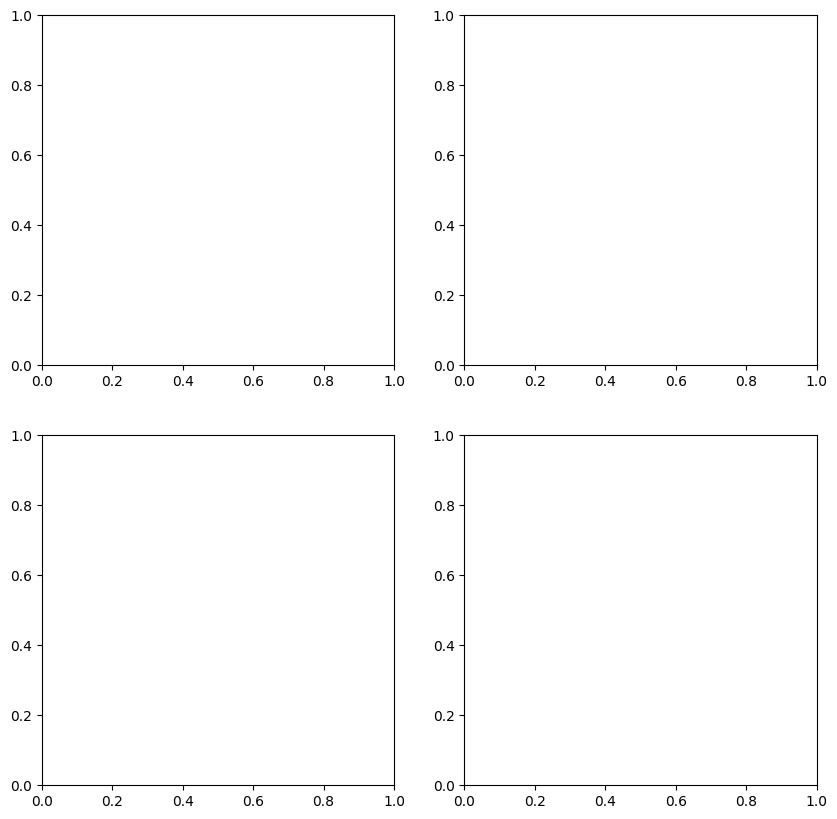

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# plot the first graph
counts = []
for i in list(range(10,500, 10)):
    gap = timedelta(minutes=i)
    count = len(threshold(gap_time(sum_rainfall(df), gap), 5))
    counts.append(count)
x_new = list(range(10, 500, 10))

# interpolate the corresponding y values for the new x values
y_new = np.interp(x_new, list(range(10, 500, 10)),counts)

# add the interpolated points to the plot
axs[0, 1].plot(x_new, y_new, 'x-')
axs[0, 1].set_title('with threshold')
axs[0, 1].set_xlabel('Gap time (minutes)')
axs[0, 1].set_ylabel('Number of events')

# plot the second graph
a=[]
for i in list(range(10, 500, 10)):
    gap = timedelta(minutes=i)
    gA=gap_time((sum_rainfall(df)),gap)
    count=len(gA)
    a.append(count)
x_new = list(range(10, 500, 10))

# interpolate the corresponding y values for the new x values
y_new = np.interp(x_new, list(range(10, 500, 10)),a)

# add the interpolated points to the plot
axs[0, 0].plot(x_new, y_new, 'x-')
axs[0, 0].set_title('without threshold')
axs[0, 0].set_xlabel('Gap time (minutes)')
axs[0, 0].set_ylabel('Number of events')

# plot the third graph
def plot_graph(ax):
  a = []
  for i in range(1, 50):
    gap = timedelta(minutes=60)
    count = len(threshold(gap_time(sum_rainfall(df), gap), i))
    a.append(count)
  ax.plot(range(1, 50), a)
  ax.set_title('with Gap_Time')

plot_graph(axs[1, 1])
axs[1, 1].set_xlabel('Rainfall Level Threshold(mm)')
axs[1, 1].set_ylabel('Number of events')

# plot the fourth graph
def plot_grapha(ax):
  a = []
  for i in range(1, 50):
    count = len(threshold(sum_rainfall(df), i))
    a.append(count)
  ax.plot(range(1, 50), a)
  ax.set_title('without Gap_Time')

plot_grapha(axs[1, 0])
axs[1, 0].set_xlabel('Rainfall Level Threshold(mm)')
axs[1, 0].set_ylabel('Number of events')

# set the overall title for the figure
fig.suptitle('Comparison of Rainfall Event Count with and without Thresholds')

# adjust the spacing between the subplots
fig.tight_layout()

# show the plot
plt.show()



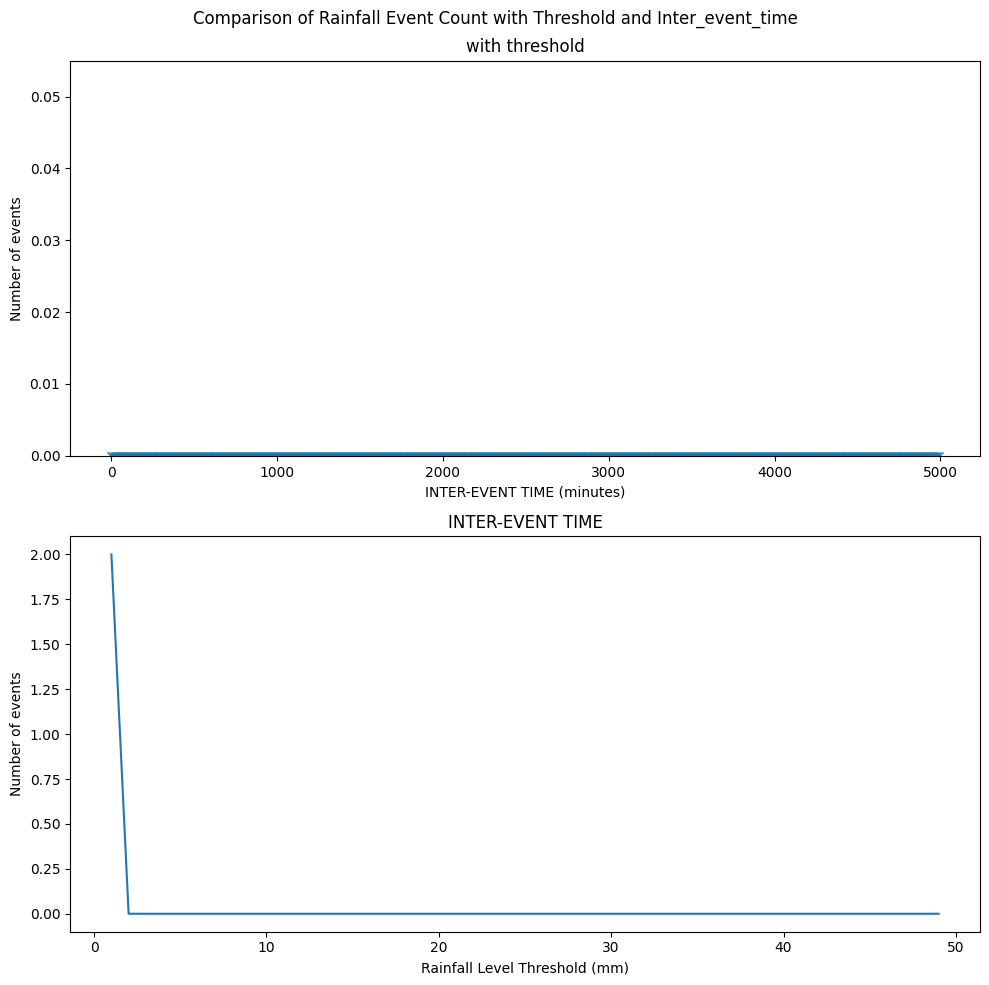

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

# create the subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# plot the first graph
counts = []
for i in list(range(0, 5000, 10)):
    gap = timedelta(minutes=i)
    count = len(threshold(gap_time(sum_rainfall(df), gap), 5))
    counts.append(count)
x_new = list(range(0, 5000, 10))

# interpolate the corresponding y values for the new x values
y_new = np.interp(x_new, list(range(0, 5000, 10)), counts)

# add the interpolated points to the plot
axs[0].plot(x_new, y_new, 'x-')
axs[0].set_title('with threshold')
axs[0].set_xlabel('INTER-EVENT TIME (minutes)')
axs[0].set_ylabel('Number of events')
axs[0].set_ylim(0)


# plot the second graph
a = []
for i in range(1, 50):
    gap = timedelta(minutes=30)
    count = len(threshold(gap_time(sum_rainfall(df), gap), i))
    a.append(count)
axs[1].plot(range(1, 50), a)
axs[1].set_title('INTER-EVENT TIME')
axs[1].set_xlabel('Rainfall Level Threshold (mm)')
axs[1].set_ylabel('Number of events')

# set the overall title for the figure
fig.suptitle('Comparison of Rainfall Event Count with Threshold and Inter_event_time')

# adjust the spacing between the subplots
fig.tight_layout()

# show the plot
plt.show()

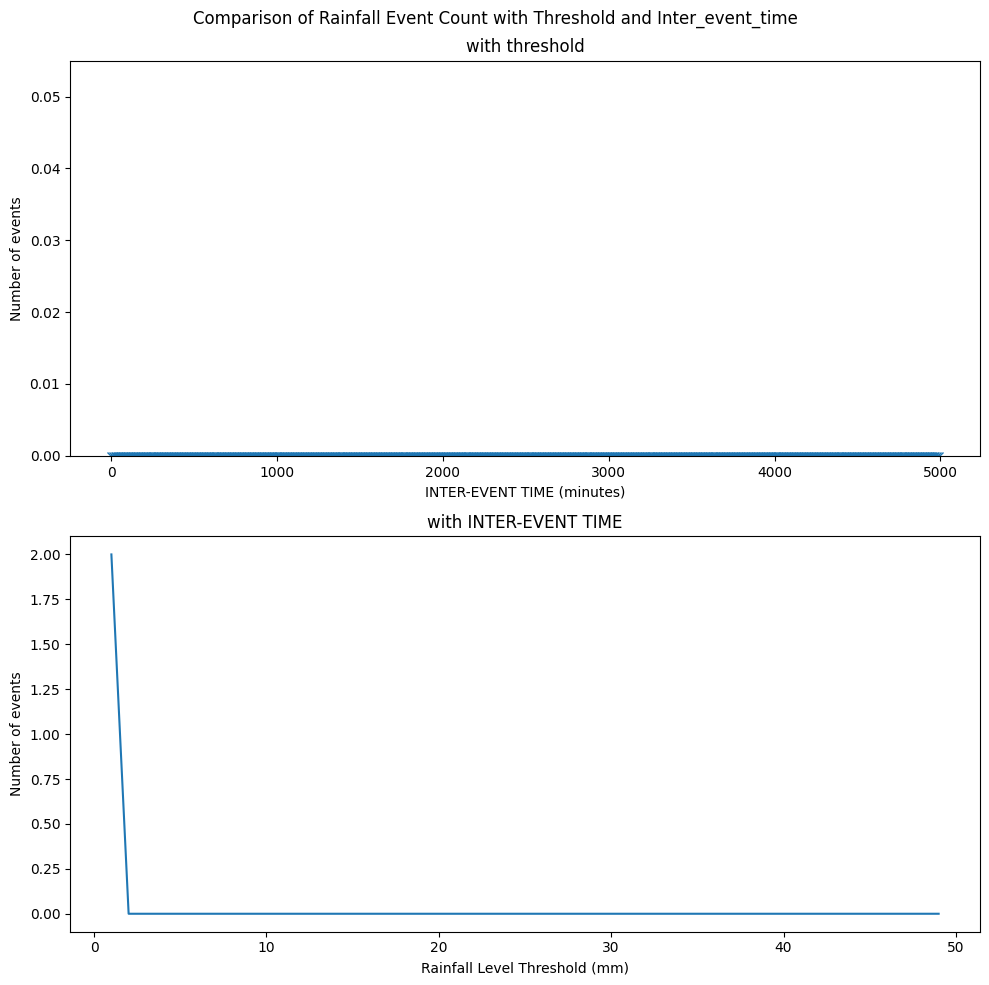

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

# create the subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# plot the first graph
counts = []
for i in list(range(0, 5000, 10)):
    gap = timedelta(minutes=i)
    count = len(threshold(gap_time(sum_rainfall(df), gap), 5))
    counts.append(count)
x_new = list(range(0, 5000, 10))

# interpolate the corresponding y values for the new x values
y_new = np.interp(x_new, list(range(0, 5000, 10)), counts)

# add the interpolated points to the plot
axs[0].plot(x_new, y_new, 'x-')
axs[0].set_title('with threshold')
axs[0].set_xlabel('INTER-EVENT TIME (minutes)')
axs[0].set_ylabel('Number of events')
axs[0].set_ylim(0)

# plot the second graph
a = []
for i in range(1, 50):
    gap = timedelta(minutes=60)
    count = len(threshold(gap_time(sum_rainfall(df), gap), i))
    a.append(count)
axs[1].plot(range(1, 50), a)
axs[1].set_title('with INTER-EVENT TIME')
axs[1].set_xlabel('Rainfall Level Threshold (mm)')
axs[1].set_ylabel('Number of events')

# set the overall title for the figure
fig.suptitle('Comparison of Rainfall Event Count with Threshold and Inter_event_time')

# adjust the spacing between the subplots
fig.tight_layout()

# show the plot
plt.show()

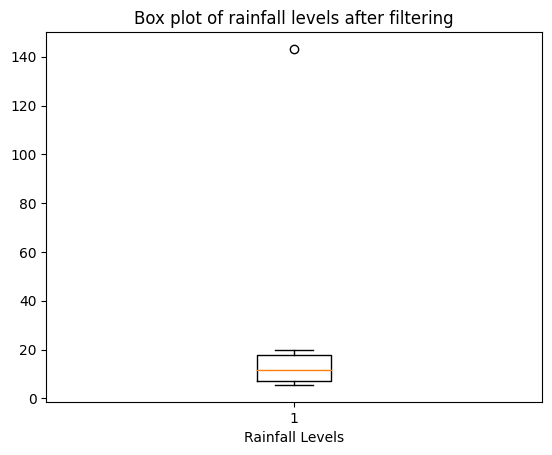

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Call the functions to get rainfall periods after filtering for gaps and threshold
periods = sum_rainfall(df)
new_periods = gap_time(periods, timedelta(minutes=1000))
new_periods = threshold(new_periods, 5)

# Get the rainfall levels for the new periods
rainfall_levels = [period[2] for period in new_periods]

# Draw the box plot
plt.boxplot(rainfall_levels)
plt.xlabel('Rainfall Levels')
plt.title('Box plot of rainfall levels after filtering')
plt.show()
